In [1]:
%pip install lifelines
%pip install tk
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

# tkinter
import tkinter as tk
import tkinter.filedialog as filedialog
from tkinter.filedialog import askopenfilename

plt.rcParams['figure.dpi'] = 400

plt.rcParams.update({'font.size': 4})

plt.rcParams["figure.figsize"] = (1.8,1.8)
plt.rcParams['axes.axisbelow'] = True


# Ktinker

In [3]:
def plot_surv(df, evento, censo, title, paso):
    kmf = KaplanMeierFitter(label=censo)
    kmf.fit(df[censo], df[evento])
    fig = kmf.plot(ci_show=False)
    
    plt.grid()
    plt.tight_layout(pad=3) #orden left bottom right top
    plt.xlabel("Months post-transplantation")
    plt.ylabel("Probability")
    plt.title(title, fontsize = 7)
    # Adjust left and bottom margins
    

    fig.set_xticks(np.arange(0,df[censo].max(), paso))
    fig.set_yticks(np.arange(0,1.1,0.1))
    
    plt.ylim([0, 1.01])
    
    

   Exitus  Sobrevida Total
0       0                5
1       1               10
2       1                3
3       0                3
4       0                6
Index(['Exitus', 'Sobrevida Total'], dtype='object')


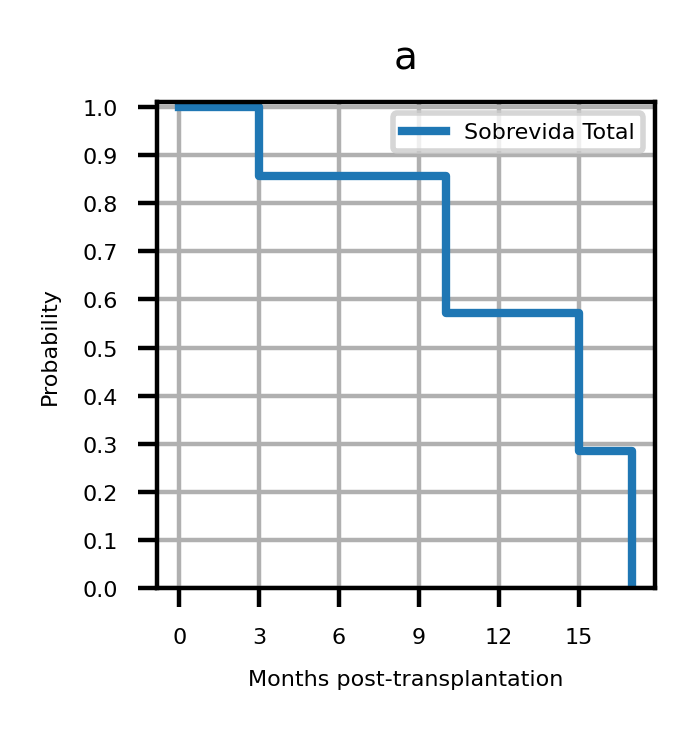

In [6]:
def browse_file():
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
    if file_path:
        load_data(file_path)

def load_data(file_path):
    try:
        df = pd.read_excel(file_path)
        ask_for_column_names(df)
    except Exception as e:
        error_label.config(text=f"Error loading file: {e}")

def ask_for_column_names(df):
    # Create a new window to ask for column names
    column_window = tk.Toplevel(window)
    column_window.title("Column Names")

    label_x = tk.Label(column_window, text="Columna del Evento")
    entry_x = tk.Entry(column_window)

    label_y = tk.Label(column_window, text="Columna de Censado")
    entry_y = tk.Entry(column_window)

    label_t = tk.Label(column_window, text="Título")
    entry_t = tk.Entry(column_window)

    label_p = tk.Label(column_window, text="Intervalo en meses")
    entry_p = tk.Entry(column_window)

    confirm_button = tk.Button(
        column_window, text="Confirm", command=lambda: get_column_names(column_window, entry_x.get(), entry_y.get(), entry_t.get(), entry_p.get(), df)
    )

    label_x.grid(row=0, column=0, pady=5)
    entry_x.grid(row=0, column=1, pady=5)
    label_y.grid(row=1, column=0, pady=5)
    entry_y.grid(row=1, column=1, pady=5)
    label_t.grid(row=2, column=0, pady=5)
    entry_t.grid(row=2, column=1, pady=5)
    label_p.grid(row=3, column=0, pady=5)
    entry_p.grid(row=3, column=1, pady=5)
    confirm_button.grid(row=4, column=0, columnspan=2, pady=10)

def get_column_names(column_window, x_column, y_column, title, inter, df):
    column_window.destroy()
    plot_data(df, x_column, y_column, title, inter)

def save_image(plt):
    file_path = filedialog.asksaveasfilename(defaultextension=".png", filetypes=[("PNG files", "*.png")])
    if file_path:
        plt.savefig(file_path)
        error_label.config(text=f"Image saved successfully: {file_path}")

def plot_data(df, x_column = "Sobrevida Total", y_column = "Exitus", title = "Sobrevida", inter = 12):
    try:
        print(df.head())  # Add this line for debugging
        print(df.columns)  # Add this line for debugging

        inter = int(inter)
        plot_surv(df, evento = x_column, censo = y_column, title = title, paso = inter)
        
        canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.grid(row=4, column=0, columnspan=2)

        # Add a navigation toolbar with a custom toolbar frame
        toolbar_frame = tk.Frame(window)
        toolbar_frame.grid(row=5, column=0, columnspan=2, pady=5)
        toolbar = NavigationToolbar2Tk(canvas, toolbar_frame)

        # Add scrollbars
        x_scrollbar = tk.Scrollbar(window, orient=tk.HORIZONTAL, command=canvas.get_tk_widget().xview)
        y_scrollbar = tk.Scrollbar(window, orient=tk.VERTICAL, command=canvas.get_tk_widget().yview)
        x_scrollbar.grid(row=6, column=0, columnspan=2, sticky="ew")
        y_scrollbar.grid(row=4, column=2, sticky="ns")
        canvas.get_tk_widget().configure(xscrollcommand=x_scrollbar.set, yscrollcommand=y_scrollbar.set)

        # Add Save Image button
        save_button = tk.Button(window, text="Save Image", command=lambda: save_image())
        save_button.grid(row=7, column=0, columnspan=2, pady=10)

    except Exception as e:
        error_label.config(text=f"Error plotting data: {e}")


# Create the main window
window = tk.Tk()
window.title("CSV Plotter")

# Create widgets
browse_button = tk.Button(window, text="Browse", command=browse_file)

error_label = tk.Label(window, text="", fg="red")

# Place widgets on the grid
browse_button.grid(row=2, column=0, columnspan=2, pady=10)
error_label.grid(row=5, column=0, columnspan=2)

# Run the Tkinter event loop
window.mainloop()